In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get some data
housing, target = fetch_california_housing(as_frame=True, return_X_y=True)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
import KDE_Synth_Data_Gen as KDESynth

# Pick if you want your variables to be generated independently or multivariately

#syn_housing = KDESynth.generate_kde_indep(housing, 1000)   # This independently samples each variable
syn_housing = KDESynth.generate_kde_multi(housing, 1000)    # This samples all variables together as a multi-variate distribution

syn_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,10.070569,13.945693,7.155420,0.877233,1449.178257,6.304708,34.664881,-118.946426
1,5.605443,49.765823,5.770871,0.969697,2142.102123,14.575792,38.145926,-122.599393
2,3.617274,23.713362,5.580869,1.073361,861.965455,4.995022,38.110690,-121.548070
3,6.626698,25.183237,5.885418,0.928892,1295.405412,4.936427,36.899381,-121.152855
4,7.476467,22.052955,7.337610,0.907131,1311.839728,2.649990,37.570658,-121.957891


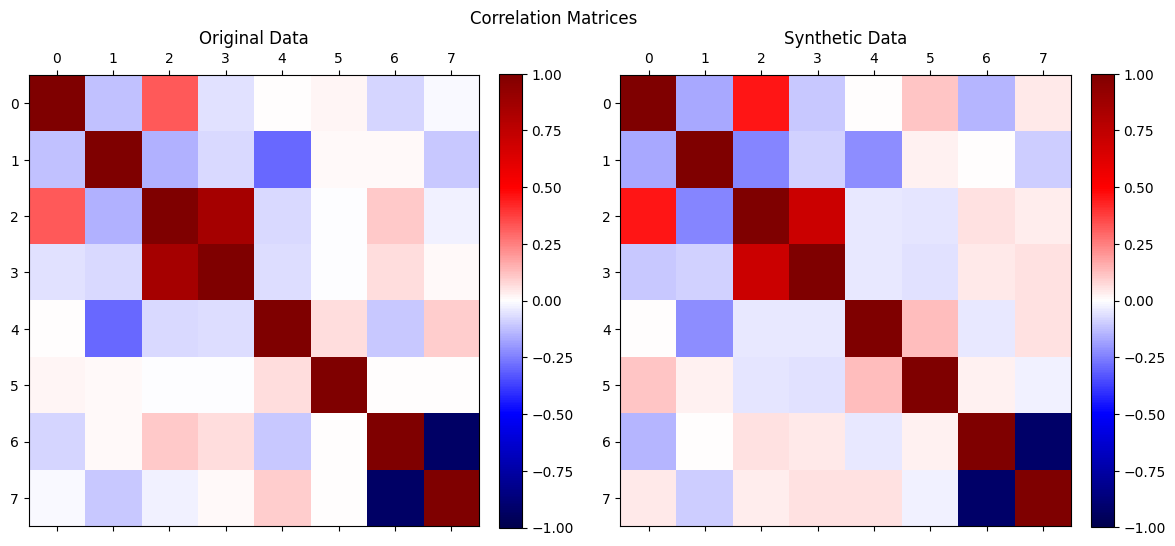

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the correlation matrix of the original data with the 'seismic' colormap
cax1 = axs[0].matshow(housing.corr(), cmap='seismic', vmin=-1, vmax=1)
fig.colorbar(cax1, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Original Data')

# Plotting the correlation matrix of the synthetic data with the 'seismic' colormap
cax2 = axs[1].matshow(syn_housing.corr(), cmap='seismic', vmin=-1, vmax=1)
fig.colorbar(cax2, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('Synthetic Data')

# Adding a main title for the entire figure
plt.suptitle('Correlation Matrices')

plt.show()

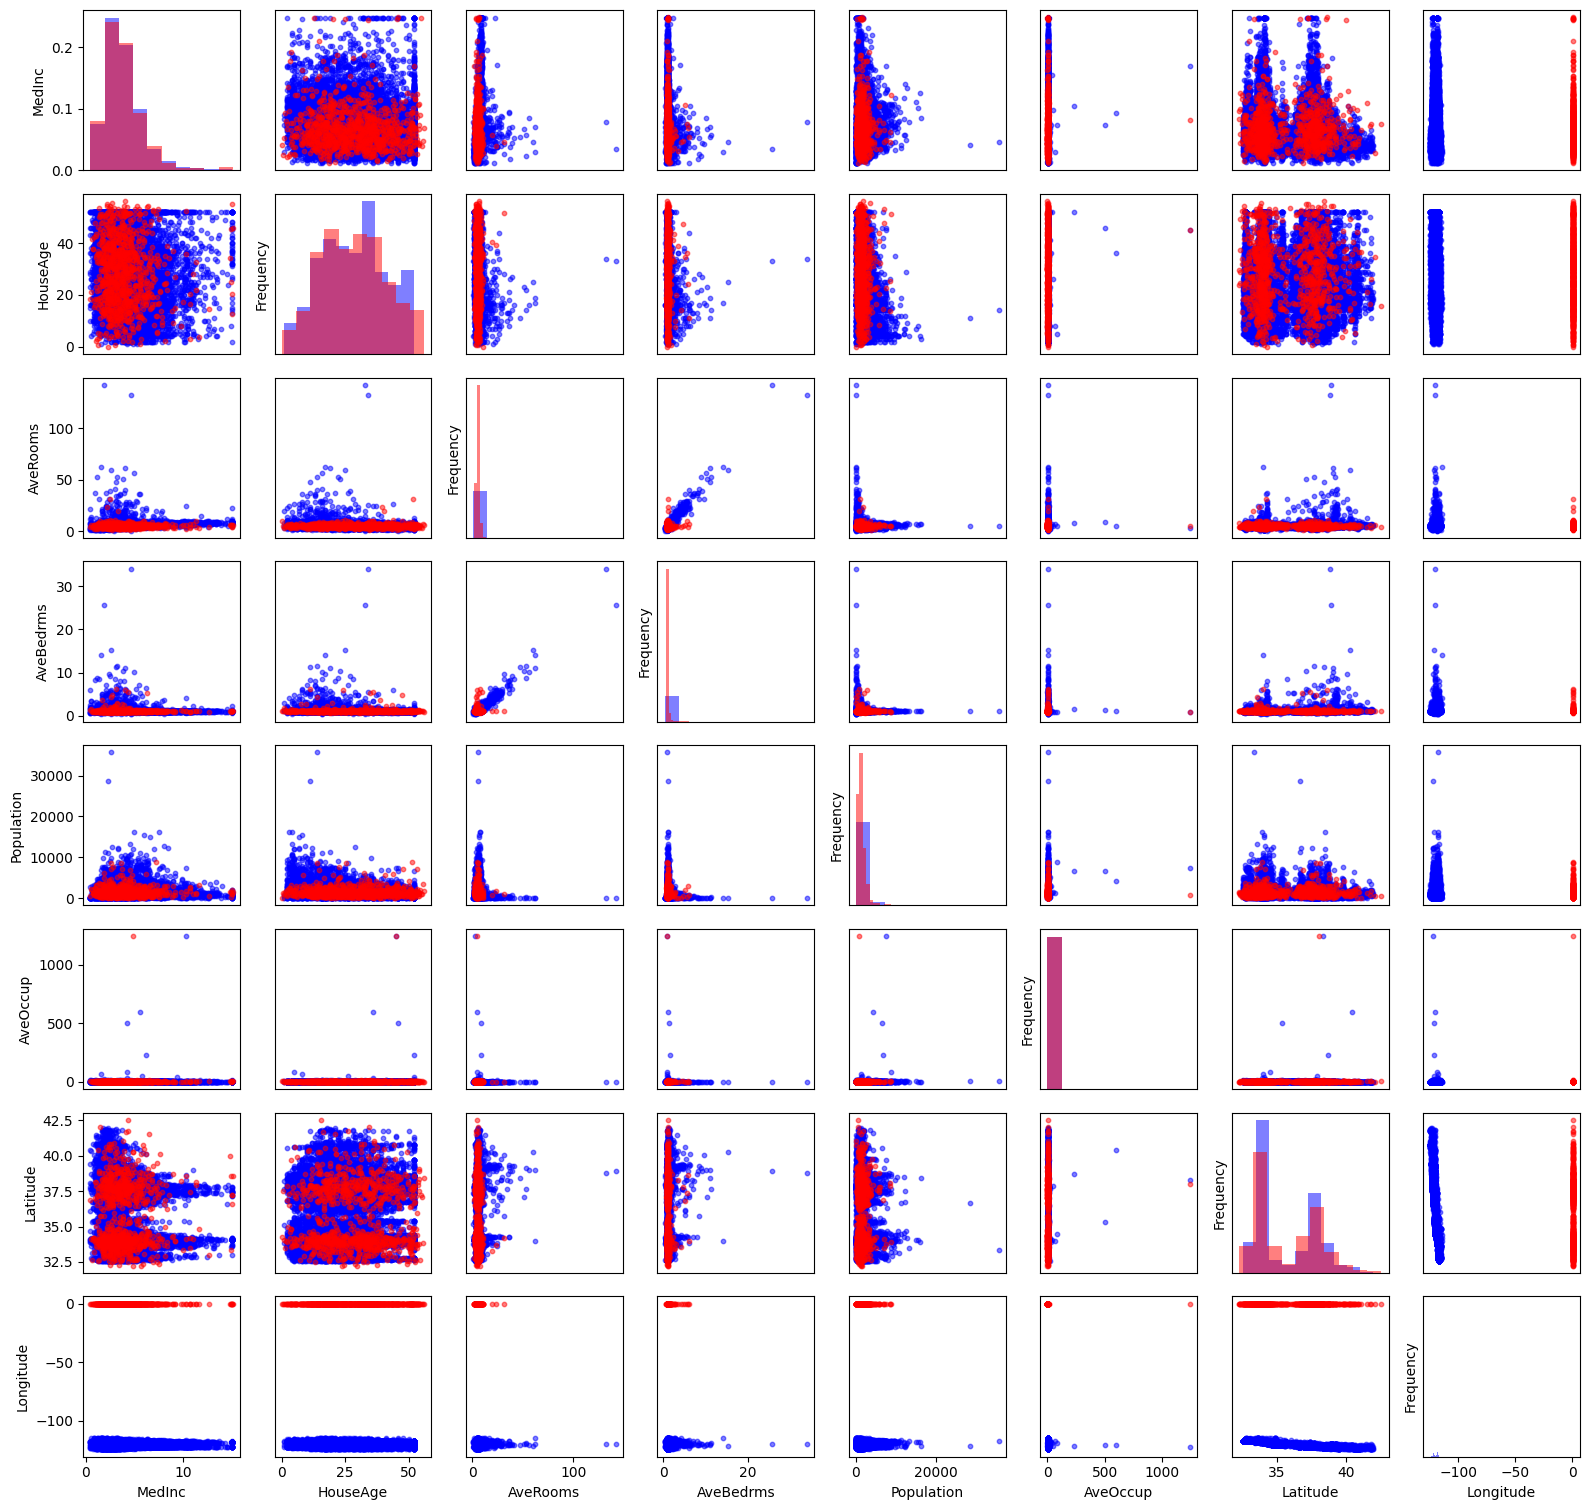

In [8]:
# Assuming 'housing' and 'syn_housing' are your dataframes
columns = housing.columns  # Assuming both dataframes have the same columns
n = len(columns)
fig, axs = plt.subplots(n, n, figsize=(16, 16), squeeze=False)

for i in range(n):
    for j in range(n):
        ax = axs[i, j]
        if i == j:
            # Diagonal: Plot histograms
            housing[columns[i]].plot(kind='hist', ax=ax, color='blue', alpha=0.5, density=True)
            syn_housing[columns[i]].plot(kind='hist', ax=ax, color='red', alpha=0.5, density=True)
        else:
            # Off-diagonal: Plot scatter
            ax.scatter(housing[columns[j]], housing[columns[i]], alpha=0.5, color='blue', s=10)
            ax.scatter(syn_housing[columns[j]], syn_housing[columns[i]], alpha=0.5, color='red', s=10)
        
        # Hide axis labels and ticks if not on the edge
        if i < n - 1: ax.set_xticks([])
        if j > 0: ax.set_yticks([])
        if j == 0: ax.set_ylabel(columns[i])
        if i == n - 1: ax.set_xlabel(columns[j])

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()